In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
LABELS = os.listdir("../food-101/images")

In [5]:
LABELS

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [6]:
test_names = []

with open("../food-101/meta/test.txt") as f:
    test_names = f.readlines()
    print(test_names.__len__())

25250


In [7]:
train_names = []

with open("../food-101/meta/train.txt") as f:
    train_names = f.readlines()
    print(train_names.__len__())

75750


In [8]:
train_names[0][:-1]

'apple_pie/1005649'

In [9]:
def get_id(name):
    names = name.split("/")
    return names[1]

In [10]:
def get_label(path):
    names = path.split("/")
    return names[0]

In [11]:
get_id(train_names[5242][:-1])

'978771'

In [12]:
train_df = pd.DataFrame(map(lambda x: x[:-1], train_names), columns=['path'])

In [13]:
train_df['label'] = train_df['path'].map(lambda x: get_label(x))

In [14]:
train_df['id'] = train_df['path'].map(lambda x: get_id(x))

In [15]:
train_df.head(10)

,path,label,id
0,apple_pie/1005649,apple_pie,1005649
1,apple_pie/1014775,apple_pie,1014775
2,apple_pie/1026328,apple_pie,1026328
3,apple_pie/1028787,apple_pie,1028787
4,apple_pie/1043283,apple_pie,1043283
5,apple_pie/1050519,apple_pie,1050519
6,apple_pie/1057749,apple_pie,1057749
7,apple_pie/1057810,apple_pie,1057810
8,apple_pie/1072416,apple_pie,1072416
9,apple_pie/1074856,apple_pie,1074856


In [16]:
test_df = pd.DataFrame(map(lambda x: x[:-1], test_names), columns=['path'])

In [17]:
test_df['label'] = test_df['path'].map(lambda x: get_label(x))

In [18]:
test_df['id'] = test_df['path'].map(lambda x: get_id(x))

In [19]:
test_df.head(10)

,path,label,id
0,apple_pie/1011328,apple_pie,1011328
1,apple_pie/101251,apple_pie,101251
2,apple_pie/1034399,apple_pie,1034399
3,apple_pie/103801,apple_pie,103801
4,apple_pie/1038694,apple_pie,1038694
5,apple_pie/1047447,apple_pie,1047447
6,apple_pie/1068632,apple_pie,1068632
7,apple_pie/110043,apple_pie,110043
8,apple_pie/1106961,apple_pie,1106961
9,apple_pie/1113017,apple_pie,1113017


In [20]:
def exact_path(path):
    return "../food-101/images/" + path + ".jpg"

In [21]:
test_df['exact_path'] = test_df['path'].map(lambda x: exact_path(x))

In [22]:
train_df['exact_path'] = train_df['path'].map(lambda x: exact_path(x))

In [23]:
train_df.head(5)

,path,label,id,exact_path
0,apple_pie/1005649,apple_pie,1005649,../food-101/images/apple_pie/1005649.jpg
1,apple_pie/1014775,apple_pie,1014775,../food-101/images/apple_pie/1014775.jpg
2,apple_pie/1026328,apple_pie,1026328,../food-101/images/apple_pie/1026328.jpg
3,apple_pie/1028787,apple_pie,1028787,../food-101/images/apple_pie/1028787.jpg
4,apple_pie/1043283,apple_pie,1043283,../food-101/images/apple_pie/1043283.jpg


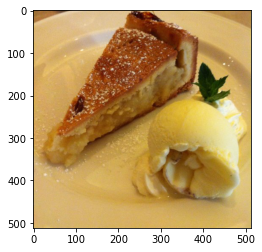

In [24]:
from matplotlib import pyplot as plt

img = plt.imread(train_df['exact_path'].iloc[580])
plt.imshow(img)

In [25]:
img.shape

(512, 512, 3)

In [26]:
from models import fine_tuned_v1 as model

In [27]:
model.model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 101)               206949    
                                                                 
Total params: 23,771,749
Trainable params: 206,949
Non-trainable params: 23,564,800
_________________________________________________________________


In [28]:
train_generator = model.data_generator.flow_from_dataframe(dataframe=train_df, 
                                               directory=None,
                                                x_col='exact_path', 
                                                y_col='label', 
                                                weight_col=None, 
                                                target_size=(256,256), 
                                                color_mode='rgb', 
                                                classes=LABELS, 
                                                class_mode='categorical', 
                                                batch_size=model.batch_size,
                                                subset='training', 
                                                shuffle=True)

Found 60600 validated image filenames belonging to 101 classes.


In [29]:
validation_generator = model.data_generator.flow_from_dataframe(dataframe=train_df, 
                                               directory=None,
                                                x_col='exact_path', 
                                                y_col='label', 
                                                weight_col=None, 
                                                target_size=(256,256), 
                                                color_mode='rgb', 
                                                classes=LABELS, 
                                                class_mode='categorical', 
                                                batch_size=model.batch_size,
                                                subset='validation', 
                                                shuffle=True)

Found 15150 validated image filenames belonging to 101 classes.


In [30]:
test_gen = model.test_generator.flow_from_dataframe(dataframe = test_df, directory=None, x_col='exact_path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=LABELS, class_mode='categorical', batch_size=model.batch_size, shuffle=True)

Found 25250 validated image filenames belonging to 101 classes.


In [31]:
model.model.compile(optimizer=model.optimizer, loss=model.loss, metrics=model.metrics)

In [32]:
history = model.model.fit(train_generator, 
                              steps_per_epoch = train_generator.samples // model.batch_size, 
                              validation_data=validation_generator, 
                              validation_steps=validation_generator.samples // model.batch_size,
                              epochs=model.epochs)

Epoch 1/10
1893/1893 [==============================] - 324s 167ms/step - loss: 1.9217 - accuracy: 0.5153 - val_loss: 15.9800 - val_accuracy: 0.0064
Epoch 2/10
1893/1893 [==============================] - 269s 142ms/step - loss: 1.3986 - accuracy: 0.6303 - val_loss: 17.5522 - val_accuracy: 0.0067
Epoch 3/10
1893/1893 [==============================] - 772s 408ms/step - loss: 1.2131 - accuracy: 0.6748 - val_loss: 18.8865 - val_accuracy: 0.0072
Epoch 4/10
1893/1893 [==============================] - 297s 157ms/step - loss: 1.0895 - accuracy: 0.7042 - val_loss: 19.9686 - val_accuracy: 0.0070
Epoch 5/10
1893/1893 [==============================] - 230s 122ms/step - loss: 0.9990 - accuracy: 0.7252 - val_loss: 21.1411 - val_accuracy: 0.0063
Epoch 6/10
1893/1893 [==============================] - 230s 121ms/step - loss: 0.9203 - accuracy: 0.7440 - val_loss: 22.2899 - val_accuracy: 0.0065
Epoch 7/10
1893/1893 [==============================] - 235s 124ms/step - loss: 0.8636 - accuracy: 0.7564 

In [33]:
history.history

{'loss': [1.9217385053634644,
  1.3986461162567139,
  1.2131009101867676,
  1.0894615650177002,
  0.9990118741989136,
  0.920303463935852,
  0.8636215329170227,
  0.8113992810249329,
  0.7679426670074463,
  0.7297328114509583],
 'accuracy': [0.5152885913848877,
  0.6302832961082458,
  0.6748448014259338,
  0.7041671872138977,
  0.7252344489097595,
  0.7439572215080261,
  0.7563564777374268,
  0.7716946005821228,
  0.7820796370506287,
  0.7910117506980896],
 'val_loss': [15.979985237121582,
  17.55219268798828,
  18.8864688873291,
  19.96856689453125,
  21.141098022460938,
  22.289892196655273,
  23.302038192749023,
  24.193439483642578,
  24.92815589904785,
  25.33359146118164],
 'val_accuracy': [0.006408562418073416,
  0.006672833114862442,
  0.007201374042779207,
  0.007003171369433403,
  0.006276426836848259,
  0.006540697533637285,
  0.006871035788208246,
  0.007069238927215338,
  0.006276426836848259,
  0.0071353064849972725]}

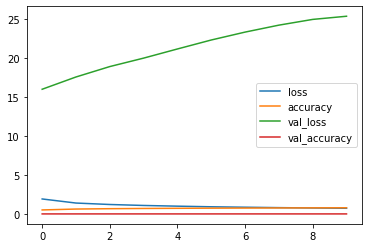

In [34]:
hist_df = pd.DataFrame(history.history)
plt.plot(hist_df)
plt.legend(hist_df)

In [35]:
hist_json = './histories/' + model.name + '.json'
with open(hist_json, mode='w') as f:
    hist_df.to_json(f)

In [36]:
model.model.save('./models/' + model.name)

INFO:tensorflow:Assets written to: ./models/fine_tuned_v1\assets


INFO:tensorflow:Assets written to: ./models/fine_tuned_v1\assets
